# Clase 1

## Ploteo y convolucion de firmas espectrales.

En esta clase veremos

1. Como leer un archivo.
2. Como hacer la convolucion entre una firma espectral y un sensor.
3. Como graficar la firma espectral medida en una imagen.


## Lectura de archivos

Para leer los archivos trabajaremos con *numpy*. 

Abriremos firmas espectrales provenientes de la libreria de aster

In [1]:
# Cargamos numpy
import numpy as np
# Cargo las funciones necesarias para interpolar la firma
import scipy as sp
from scipy import interpolate
# Ignoro ciertos warnings
np.seterr(invalid='ignore');

Abrimos y leemos una firma espectral

In [2]:
# Creamos una variable con la direccion del archivo
firma_in = "../material/firmas/B28_1.txt"

# Leemos la firma.
# skip_header se usa para saltear el header del archivo
firma = np.genfromtxt(firma_in,skip_header=7)
# Convierto la firma a reflectancia entre 0 y 1
firma[:,3] = firma[:,3]

# Pongo como valor no valido los valores cero
# Busco los valores cero
mask = firma[:,3]<=0
# Los enmascaro como nan
firma[mask]=np.nan
# Interpolo la firma en el intervalo de interes
fi = interpolate.interp1d(firma[:,0], firma[:,3])
mask = ~mask # Invierto la mascara

Leemos la banda para hacer la convolucion

In [3]:
# Seleccionamos el archivo con la banda
banda_in = "../material/respuestas/landsat_8_B7.csv"

# Leemos la firma.
# skip_header se usa para saltear el header del archivo, delimitador = ','
banda = np.genfromtxt(banda_in,skip_header=1,delimiter=',')

Leemos la irradiancia solar

## Convolucion de una banda

Para hacer la convolucion de una banda, tenemos que calcular

$$ \rho_b = \frac{\int_{\lambda_{min}}^{\lambda_{max}} \rho_{\lambda, sensor} f(\lambda) d\lambda}{\int_{\lambda_{min}}^{\lambda_{max}} f(\lambda)d\lambda}$$

1. el siguiente codigo compara las firmas espectrales con la respuesa del sensor
2. calcula las funciones a integrar
3. las integra por el metodo de simpson

para el paso 3, utilizaremos la libreria scipy

In [4]:
# Creo los arrays vacios para guardar los datos
wl = banda[:,0]
f = banda[:,1]
r = fi(wl)
fL = f*r

In [5]:
# Importo scipy y las herramientas de integracion
from scipy import integrate

In [6]:
# Integro la funcion y hago el cociente
rb = sp.integrate.simps(y=fL,x=wl)/sp.integrate.simps(y=f,x=wl)
rb

77.878408887434873

## Graficar una firma espectral

Para graficar uan firma espectral volveremos a utilizar matplotlib con la opcion inline.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

*Ejemplo:* Firma espectral entre dos valores

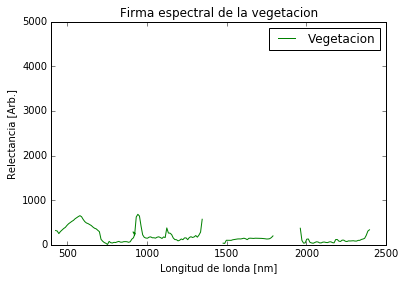

In [8]:
# Grafico la reflectancia contra la longitud de onda
plt.plot(firma[:,0],firma[:,3], label="Vegetacion", color="green")
# Pongo el limite en x e y
plt.xlim(400,2500)
plt.ylim(0,5000)

# Incluyo la leyenda
plt.legend()
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")
# Pongo titulo
plt.title("Firma espectral de la vegetacion")

*Ejemplo:* Firma espectral y respuesta del sensor

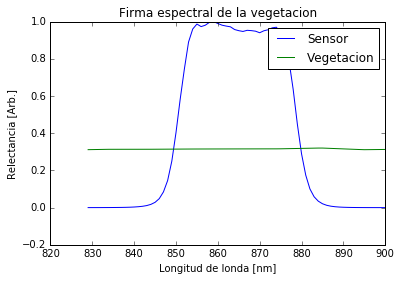

In [57]:
# Grafico la respuesta del sensor
plt.plot(wl,f, label="Sensor")
# Grafco la firma de la vegetacion
plt.plot(wl,r, label="Vegetacion")

# Incluyo la leyenda
plt.legend()
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")
# Pongo titulo
plt.title("Firma espectral de la vegetacion")

*Ejemplo:* Firma espectral y puntos tomados a partir de la imagen

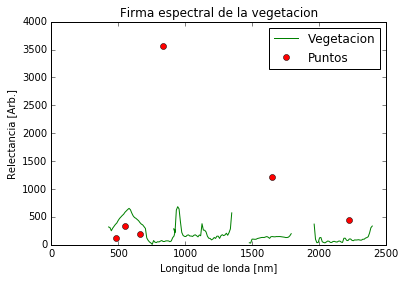

In [185]:
# Grafico primero la firma espectral
# Grafico la reflectancia contra la longitud de onda
s2 = firma[:,4]-firma[:,2]
plt.plot(firma[:,0],firma[:,3], label="Vegetacion", color="green")

# Grafico los puntos tomados en la imagen
# Fijo las longitudes de onda de cada banda
l = [485,550,660,835,1650,2220]
# Fijo la reflectancia medida en la imagen
r = [128,329,185,3568,1219,442]
# Grafico la reflectancia con puntos
plt.plot(l,r,'o', color="red", label="Puntos")
# Pongo el limite en x e y
#plt.xlim(400,2500)
#plt.ylim(0,5000)

# Incluyo la leyenda
plt.legend(numpoints=1)
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")
# Pongo titulo
plt.title("Firma espectral de la vegetacion")